In [2]:
using CircularArrays,Plots

### 1. Clean Implementation (Slow)

In [9]:
struct Code
    len::Int
    state::CircularArray{UInt8,2}
    future::CircularArray{UInt8,2}
end

function Code(l,v)
    if v==0
       return Code(l,CircularArray{UInt8,2}(zeros(UInt8,l,l)),CircularArray(zeros(UInt8,l,l)))
    else
        return Code(l,CircularArray{UInt8,2}(ones(UInt8,l,l)),CircularArray(zeros(UInt8,l,l)))
    end
end
"""
    toomRule!(c::Code)

write c.future according to toom's rule and c.state
"""
function toomRule!(c::Code)
    for i in axes(c.state,1)
        for j in axes(c.state,2)
            if c.state[i,j]+c.state[i+1,j]+c.state[i,j+1] >= 2 
                c.future[i,j]=1
            else
                c.future[i,j]=0
           end
        end
    end
end

"""
    noise!(c::Code,p,q)

apply the noise to c.future and write the result in c.state 
"""
function noise!(c::Code,p,q)
    for i in axes(c.state,1)
        for j in axes(c.state,2)
            if c.future[i,j]==1 && rand()<q
                c.state[i,j]=0
            elseif c.future[i,j]==0 && rand()<p
                c.state[i,j]=1
            else
                c.state[i,j]=c.future[i,j]
            end
        end
    end
end

"""
    logical(c::Code)

return the logical value stored in c
"""
function logical(c::Code)
    if sum(c.state)>c.len*c.len/2
        return 1
    else
        return 0
    end
end



Code

In [12]:
function main()
    avgNum=100

    ls=[2,4,8,16]
    ps=collect(0:0.02:.5)


    data=Array{Any}(undef,length(ls),length(ps))


    for i_l in eachindex(ls)
        l=ls[i_l]
        T=5*l
        println("\nl:$l")
        for i_p in eachindex(ps)
            p=ps[i_p]
            print("p:$p| ")
            k=0
            for r in 1:avgNum
                
                c=Code(l,0)
                for t in 1:T
                    toomRule!(c)
                    noise!(c,p,p)

                end
                k+=logical(c)
            end
            data[i_l,i_p]=k/avgNum
        end
    end

end

main()


l:2
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 
l:4
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 
l:8
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 
l:16
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 

### 2. Simple Implementation (Fast)

In [18]:
"""
    toomRule(code::CircularArray,r)

return the propsed future state of the site r=i,j according to the toom's rule
"""
function toomRule(code::CircularArray,r)
    i,j=r
    
    if code[i,j]+code[i+1,j]+code[i,j+1] >= 2 
        return 1
    else
        return 0
   end
end

"""
    evolve(code::CircularArray,p,q)

one step evolution of the lattice code according to rule followed by noise with parameters p and q
"""
function evolve(code::CircularArray{UInt8,2},rule,p,q)
    l=size(code,1)
    futureCode=CircularArray(zeros(UInt8,l,l))
    for i in axes(code,1)
        for j in axes(code,2)
            futureCode[i,j]=rule(code,(i,j))
            if futureCode[i,j]==1 && rand()<q
                futureCode[i,j]=0
            elseif futureCode[i,j]==0 && rand()<p
                futureCode[i,j]=1
            end
        end
    end
    return futureCode
end


"""
    logical(c::Code)

return the logical value stored in c
"""
function logical(code::CircularArray{UInt8,2})
    if sum(code)>size(code,1)^2/2
        return 1
    else
        return 0
    end
end

logical

In [19]:
avgNum=1000

ls=[2,4,8,16]
ps=collect(0:0.02:.5)


data=Array{Any}(undef,length(ls),length(ps))


for i_l in eachindex(ls)
    l=ls[i_l]
    T=5*l
    println("\nl:$l")
    for i_p in eachindex(ps)
        p=ps[i_p]
        print("p:$p| ")
        k=0
        for r in 1:avgNum
            code=CircularArray(zeros(UInt8,l,l))
            for t in 1:T
                code=evolve(code,toomRule,p,p)
            end
            k+=logical(code)
        end
        data[i_l,i_p]=k/avgNum
    end
end




l:2
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 
l:4
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 
l:8
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 
l:16
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 

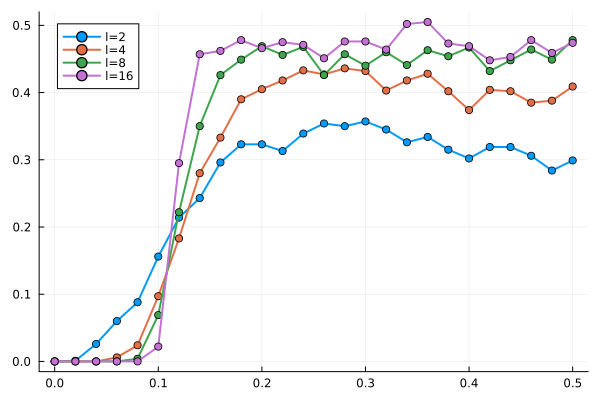

In [20]:
plt=plot()
for i_l in eachindex(ls)
    l=ls[i_l]
    Ys=[]
    for i_p in eachindex(ps)
        push!(Ys, data[i_l,i_p])
    end
    plot!(plt,ps,Ys,label="l=$l",marker=:circle,lw=2)
end
display(plt)

### 3. Noise density 

In [25]:
avgNum=100

ls=[2,4,8,16]
ps=collect(0:0.02:.5)


data=Array{Any}(undef,length(ls),length(ps))


for i_l in eachindex(ls)
    l=ls[i_l]
    T=5*l
    println("\nl:$l")
    for i_p in eachindex(ps)
        p=ps[i_p]
        print("p:$p| ")
        
        k=0
        magnetization=zeros(Float64,T)

        for r in 1:avgNum
            code=CircularArray(zeros(UInt8,l,l))
            for t in 1:T
                code=evolve(code,toomRule,p,p)
                magnetization[t]+=sum(code)/l^2
            end
            k+=logical(code)
        end
        data[i_l,i_p]=[k/avgNum,magnetization./avgNum]
    end
end




l:2
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 
l:4
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 
l:8
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 
l:16
p:0.0| p:0.02| p:0.04| p:0.06| p:0.08| p:0.1| p:0.12| p:0.14| p:0.16| p:0.18| p:0.2| p:0.22| p:0.24| p:0.26| p:0.28| p:0.3| p:0.32| p:0.34| p:0.36| p:0.38| p:0.4| p:0.42| p:0.44| p:0.46| p:0.48| p:0.5| 

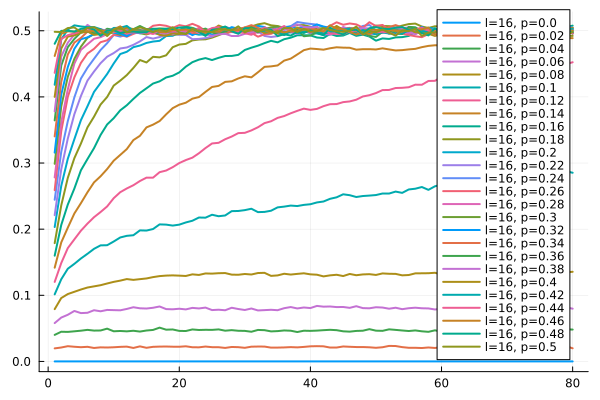

In [29]:
plt=plot()
for i_l in eachindex(ls)
    l=ls[i_l]
    if l!=16 continue end
    Ys=[]
    for i_p in eachindex(ps)
        p=ps[i_p]
        push!(Ys, )
        plot!(plt,data[i_l,i_p][2],label="l=$l, p=$p",lw=2)

    end
end
display(plt)